# Regression
1. Theoritical
2. Maths
3. Programming

## Use case Regression - Numeric Prediction
- user case = hub flat price prediction
- independent features = rooms, square ft, renonvation , near mrt
- dependent feature (predicted variable) = Price


1. Simple Linear Regression
    - Only one independent feature = squareft >> One X feature
    - Only one dependent feature = Price >> One Y feature
    
    
2. Multiple Linear Regression
    - many independent feature = square ft, renovation, near mrt >> Many X feature
    - Only one dependent feature = Price >> One Y feature
    


1. Simple Linear Regression
- Goal = Take the independent feature value and predict the dependent feature value
- Relationship between feature value and dependent faeture value
- Correlation : Strength of two variables
- Regression : How independent decides/effects the dependent, model fitting

Y = MX + C

- M = Slope
- C = intercept
- X = dependent feature value
- Y = dependent feature value

Finding M = Slope of Straight line
- M = (Y2 - Y1)/(X2 - X1)

Finding C
- C = Y - MX, use it for all data points, eg calculate for Y1 and Y2 ...


Eg. find the Predicted Price for Y if
- M = 150, C = 75000, X = 1800
- Y = (150 * 1800) + 75000
- Y = 195000


- Y Predicted = 195000
- Actual = 220 000
- (POSITIVE ERROR) Difference between actual and predicted = 220000 - 195000 = 25000


- Y Predicted = 195000
- Actual = 165 000
- (NEGETIVE ERROR) Difference between actual and predicted = 165000 - 195000 = -(30000)


- To calculate the error of all the rows (Square all errors)
  - Least Square Method

- Predicted Y
- (yhat)y^

# WORKING with FUELCONSUMPTIONCO2.CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_fuel = pd.read_csv('FuelConsumptionCo2.csv')
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df_fuel.shape

(1067, 13)

In [4]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# all columns except co2emmisions can be considered as INDEPENDENT VARIABLES
# Last column CO2EMISSION can be dependent variable
# multiple linear regression

# engine size can be considered as INDEPENDENT VARIABLE
# last column CO2EMISSION can be dependent variable
# SIMPLE LINEAR REGRESSION

In [6]:
# Since we are using Simple Linear Regression
## ENGINESIZE can be considered as INDEPENDENT VARIABLE
## last column CO2EMISSION can be dependent variable
## SIMPLE LINEAR REGRESSION
df_simple = df_fuel[['ENGINESIZE', 'CO2EMISSIONS']]
df_simple.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


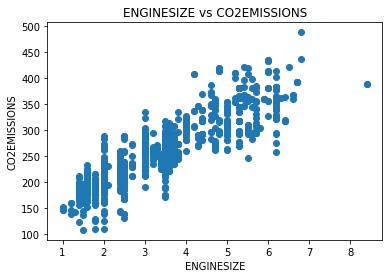

In [7]:
plt.scatter(df_simple['ENGINESIZE'], df_simple['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS');

In [8]:
# divide the data into train and test
## 80:20

split = int(len(df_simple) * 0.8)
train_df = df_simple[:split]
test_df = df_simple[split:]

print("add records ", len(df_simple))
print("training records ", len(train_df))
print("testing records ", len(test_df))

add records  1067
training records  853
testing records  214


In [9]:
# Simple Linear Regression
## Best Fit for my model

##Slope . y2-y1/x2-x1
##11.    Intercept C = Y – mx  
## C = ymean – m(slope) * xmean
#1.    X features 
#2.    Y feature 
#3.    X mean
#4.    Y mean
#5.    X sum
#6.    Y sum
#7.    Sum(x*y) n 
#8.    X*x 
#9.    Square of 
#10.    Slope . y2-y1/x2-x1
#11.    Intercept C = Y – mx  
#a.    C = ymean – m(slope) * xmean
 ## creation of function simple_lr()
def simple_lr(input_feature, output):
    
    xi = input_feature
    yi = output
    
    
    ## total number of data points 
    n = len(xi)
    
    #xmean
    x_mean = xi.mean()
    
    #ymean
    y_mean = yi.mean()
    
    
    #sumof x
    sum_x = xi.sum()
    
    #sum of y 
    sum_y = yi.sum()
    
    #Sum(x*y) multiplie dby n
    sum_xy = ((xi*yi).sum())*n
    
    
    #sum sum_x and sum_yy 
    sumofxy = sum_x * sum_y
    
    #Sum(x*x) multiplie dby n
    sum_xx = ((xi*xi).sum())*n
    
    
    ##square of sum of x
    sum_square  = sum_x * sum_x
    
    #slope 
    slope = (sum_xy - sumofxy) /  (sum_xx - sum_square)
    
    # intercept
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

In [10]:
# calling the function simple_lr() by dummy data intitially

dummy_x = np.array((1,2,3,4,5))
dummy_y = np.array((1,2,3,4,5))


## CAll the function Simple_LR(input_feature, output)
dummy_slope , dummy_intercept = simple_lr(dummy_x,dummy_y)
print (f'slope dummy :', dummy_slope)
print(f'intercept dummy :', dummy_intercept)

slope dummy : 1.0
intercept dummy : 0.0


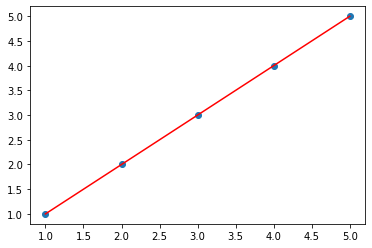

In [11]:
plt.scatter(dummy_x, dummy_y)
plt.plot(dummy_x, dummy_y, color = "red")
plt.show()

In [12]:
real_slope , real_intercept = simple_lr(train_df['ENGINESIZE'] ,train_df['CO2EMISSIONS'])
print (f'slope dummy :', real_slope)
print(f'intercept dummy :', real_intercept)

slope dummy : 38.79512383605654
intercept dummy : 127.16989950881984


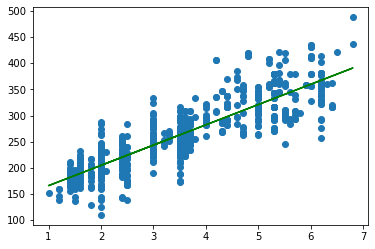

In [13]:
plt.scatter(train_df['ENGINESIZE'],train_df['CO2EMISSIONS'])
plt.plot(train_df['ENGINESIZE'],real_slope*train_df['ENGINESIZE'] +real_intercept ,  color = "green")
plt.show()

In [14]:
def prediction(input, slope, intercept):
    pred_y = real_slope*input + real_intercept
    return pred_y

In [15]:
# What is my CO2 Emission if ENGINESIZE = 5 ???

eng_size = 5
predicted_co2emission = prediction(eng_size, real_slope, real_intercept)
print(predicted_co2emission)

321.1455186891026


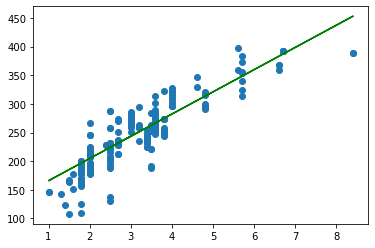

In [16]:
plt.scatter(test_df['ENGINESIZE'],test_df['CO2EMISSIONS'])
plt.plot(test_df['ENGINESIZE'],real_slope*test_df['ENGINESIZE'] +real_intercept ,  color = "green")
plt.show()

In [17]:
## test this for entire dataset 

Predicted_y_co2emission = prediction( df_simple['ENGINESIZE'] ,real_slope, real_intercept  )
print(Predicted_y_co2emission)

0       204.760147
1       220.278197
2       185.362585
3       262.952833
4       262.952833
           ...    
1062    243.555271
1063    251.314296
1064    243.555271
1065    251.314296
1066    251.314296
Name: ENGINESIZE, Length: 1067, dtype: float64


In [18]:
actual_predicted = pd.DataFrame({"Actual co2emission": df_simple['CO2EMISSIONS'], "Predicted y co2emission" : Predicted_y_co2emission})
print(actual_predicted.head())

   Actual co2emission  Predicted y co2emission
0                 196               204.760147
1                 221               220.278197
2                 136               185.362585
3                 255               262.952833
4                 244               262.952833


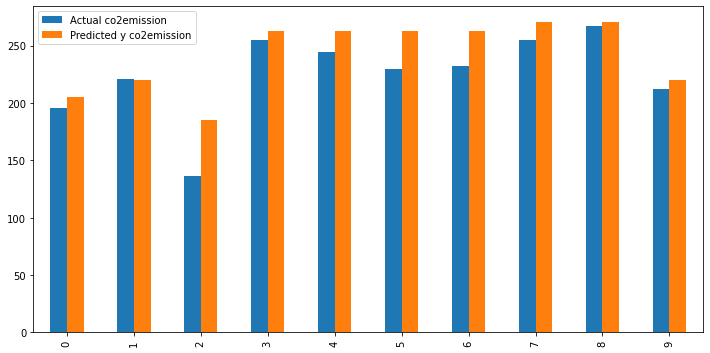

In [19]:
actual_predicted.head(10).plot(kind = 'bar' , figsize = (12,6));

In [20]:
## Error/ Variance/ difference
## Square of errors
## Sum of square of errors

def error_metrics(input, output, slope, intercept):
    # y = mx + c
    pred = slope * input + intercept
    #error /residual
    error = (output - pred)
    
    #square errors
    sse = (error * error).sum()
    return sse

In [21]:
print (f'SSE:', error_metrics(test_df['ENGINESIZE'],test_df['CO2EMISSIONS'], real_slope , real_intercept) )

SSE: 159741.10295932254


# 5PM CLASS using SKLEARN instead

In [22]:
### using sklearn 

df_fuel_sk  = pd.read_csv('FuelConsumptionCo2.csv')
print (df_fuel_sk.shape)
df_fuel_sk.head()

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
df_simple_sk = df_fuel_sk[['ENGINESIZE', 'CO2EMISSIONS']]
df_simple_sk.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


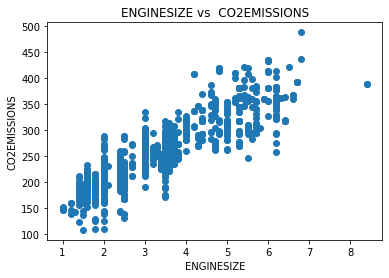

In [24]:
## analysis 
##'ENGINESIZE' vs  'CO2EMISSIONS'

plt.scatter(df_simple_sk['ENGINESIZE'], df_simple_sk['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title("ENGINESIZE vs  CO2EMISSIONS")
plt.show()

In [25]:
# sklearn linear regression
from sklearn import linear_model

In [26]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(df_simple_sk['ENGINESIZE'],df_simple_sk['CO2EMISSIONS'], test_size = 0.2)


In [27]:
# divide the data into train and test
## 80:20

split = int(len(df_simple_sk) * 0.8)
train_df_sk = df_simple_sk[:split]
test_df_sk = df_simple_sk[split:]

print("add records ", len(df_simple_sk))
print("training records ", len(train_df_sk))
print("test records ", len(test_df_sk))


add records  1067
training records  853
test records  214


In [28]:
## use sklearn linear regression 
## fit model 
## slope and intercept 

regr = linear_model.LinearRegression()
train_x  = np.array(train_df_sk[["ENGINESIZE"]]) 
train_y  = np.array(train_df_sk[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

LinearRegression()

In [29]:
coeff = regr.coef_
intercept = regr.intercept_

In [30]:
print(f"slope", coeff[0])
print(f"intercept", intercept)

slope [38.79512384]
intercept [127.16989951]


In [31]:
# prediction of train_df_sk

predict_engine = regr.predict(train_df_sk[['ENGINESIZE']])
predict_engine[:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

In [32]:
# prediction of test_df_sk

predict_engine = regr.predict(test_df_sk[['ENGINESIZE']])
predict_engine[:5]

array([[224.1577091 ],
       [262.95283294],
       [224.1577091 ],
       [224.1577091 ],
       [197.00112241]])

In [33]:
actual_predicted = pd.DataFrame({"Actual co2emission": df_simple['CO2EMISSIONS'], "Predicted y co2emission":Predicted_y_co2emission})
actual_predicted.head()

,Actual co2emission,Predicted y co2emission
0,196,204.760147
1,221,220.278197
2,136,185.362585
3,255,262.952833
4,244,262.952833


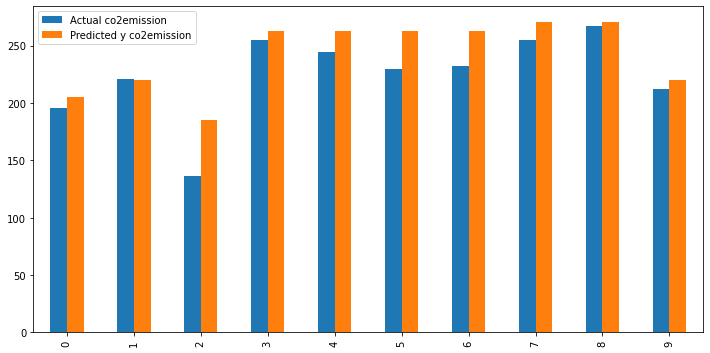

In [34]:
actual_predicted.head(10).plot(kind = 'bar', figsize = (12,6))
plt.show()